In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

# Load the dataset (assuming it's in a CSV file named 'CarPrice_data.csv')
df = pd.read_csv('CarPrice_data.csv')
df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [5]:
# Structure of the dataset
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [6]:
# Count of missing values
print(df.isna().sum().sum())



0


In [7]:
# Dimensions of the data
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])



Number of rows: 205
Number of columns: 26


In [8]:
# Data Summary
print("Mean of horsepower:", df['horsepower'].mean())
print("Median of horsepower:", df['horsepower'].median())
print("Variance of horsepower:", df['horsepower'].var())
print("Standard deviation of horsepower:", df['horsepower'].std())
print("Quantiles of horsepower:", df['horsepower'].quantile())
print(df.describe())




Mean of horsepower: 104.1170731707317
Median of horsepower: 95.0
Variance of horsepower: 1563.7411286465806
Standard deviation of horsepower: 39.54416680936116
Quantiles of horsepower: 95.0
           car_ID   symboling   wheelbase   carlength    carwidth   carheight   
count  205.000000  205.000000  205.000000  205.000000  205.000000  205.000000  \
mean   103.000000    0.834146   98.756585  174.049268   65.907805   53.724878   
std     59.322565    1.245307    6.021776   12.337289    2.145204    2.443522   
min      1.000000   -2.000000   86.600000  141.100000   60.300000   47.800000   
25%     52.000000    0.000000   94.500000  166.300000   64.100000   52.000000   
50%    103.000000    1.000000   97.000000  173.200000   65.500000   54.100000   
75%    154.000000    2.000000  102.400000  183.100000   66.900000   55.500000   
max    205.000000    3.000000  120.900000  208.100000   72.300000   59.800000   

        curbweight  enginesize   boreratio      stroke  compressionratio   
coun

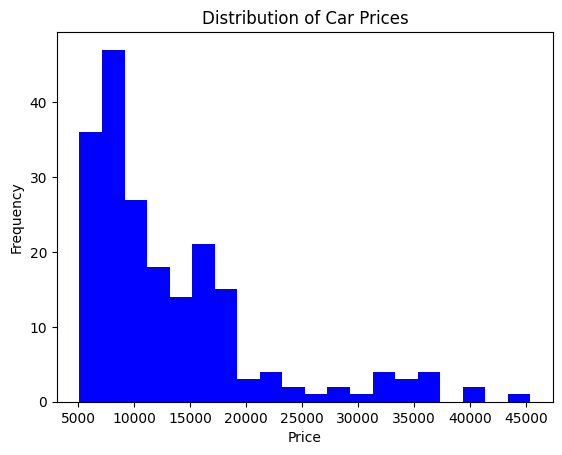

In [9]:
# Data visualization in Python
# Histogram of price
plt.hist(df['price'], bins=20, color='blue')
plt.title('Distribution of Car Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()



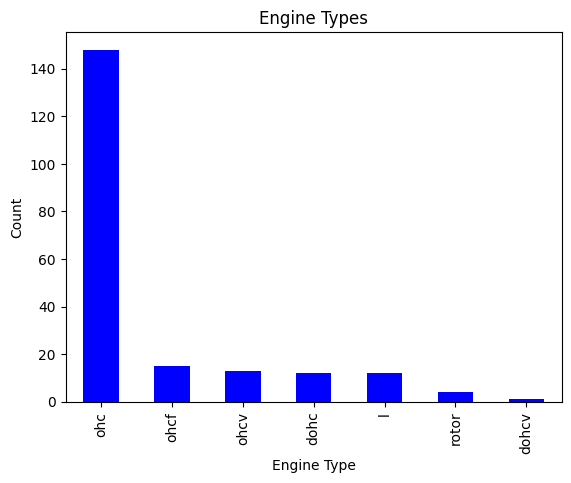

In [10]:
# Bar plot of engine types
df['enginetype'].value_counts().plot(kind='bar', color='blue')
plt.title('Engine Types')
plt.xlabel('Engine Type')
plt.ylabel('Count')
plt.show()



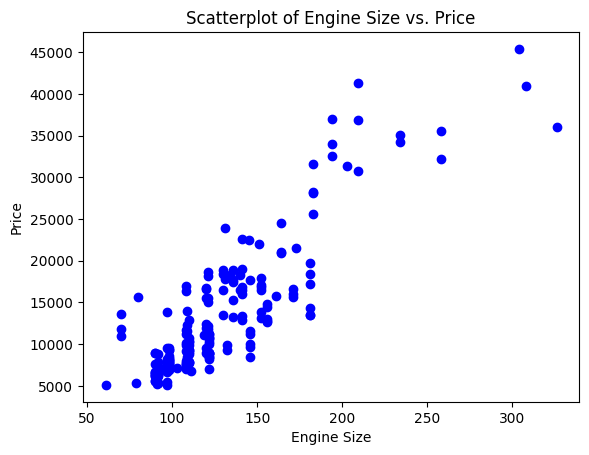

In [11]:
# Scatterplot of enginesize vs price
plt.scatter(df['enginesize'], df['price'], color='blue')
plt.title('Scatterplot of Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()



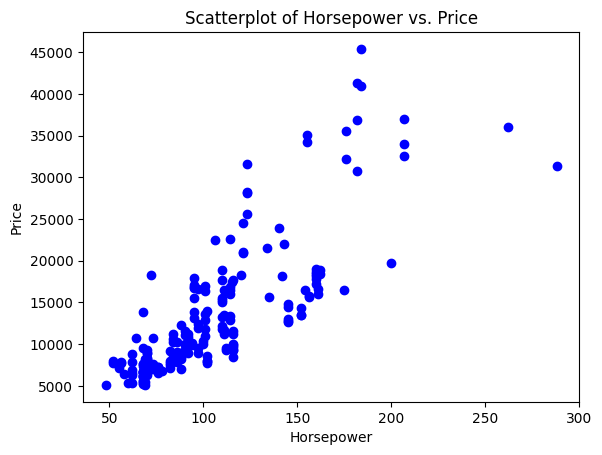

In [12]:
# Scatterplot of horsepower vs price
plt.scatter(df['horsepower'], df['price'], color='blue')
plt.title('Scatterplot of Horsepower vs. Price')
plt.xlabel('Horsepower')
plt.ylabel('Price')
plt.show()



Correlation between price and highwaympg: -0.6975990916465566
Correlation between citympg and price: -0.6857513360270401
Correlation between horsepower and price: 0.8081388225362212
Correlation between carlength and price: 0.6829200156779629
Correlation between carwidth and price: 0.7593252997415118
Correlation between enginesize and price: 0.8741448025245112


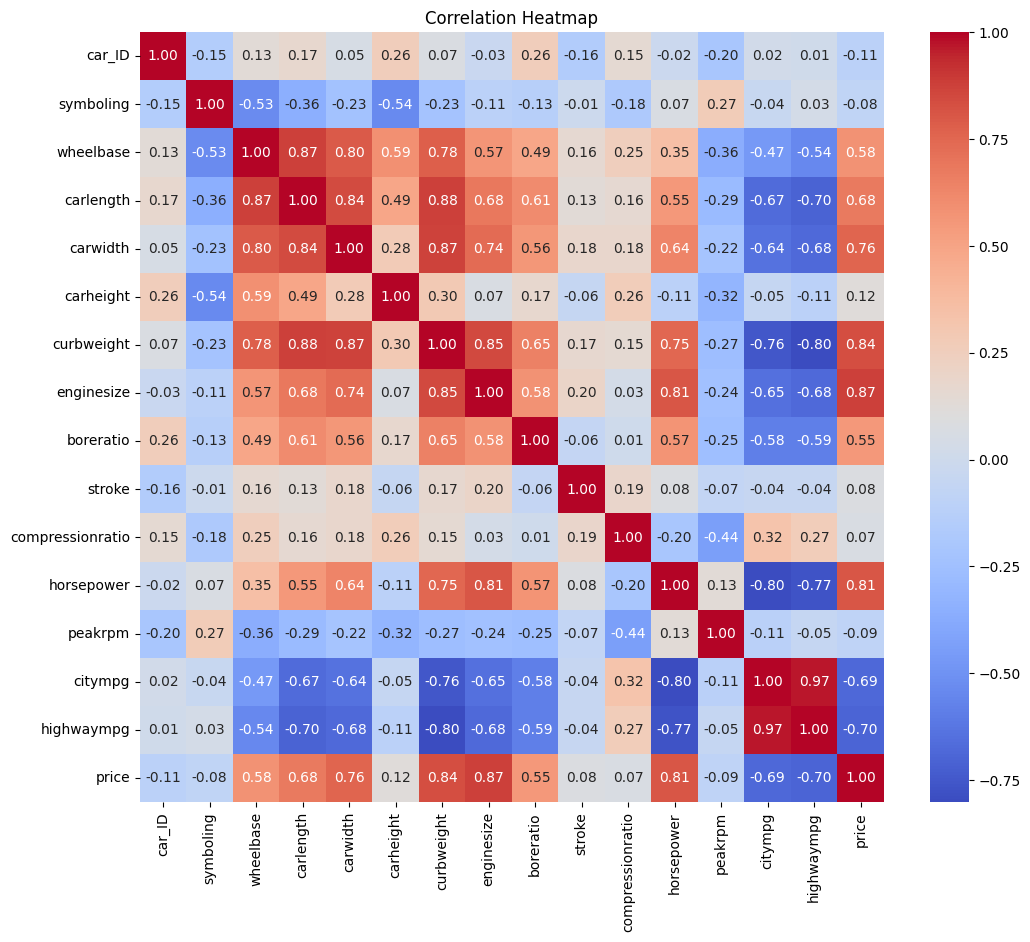

In [13]:
# Correlation factors
print("Correlation between price and highwaympg:", df['price'].corr(df['highwaympg']))
print("Correlation between citympg and price:", df['citympg'].corr(df['price']))
print("Correlation between horsepower and price:", df['horsepower'].corr(df['price']))
print("Correlation between carlength and price:", df['carlength'].corr(df['price']))
print("Correlation between carwidth and price:", df['carwidth'].corr(df['price']))
print("Correlation between enginesize and price:", df['enginesize'].corr(df['price']))

# Correlation matrix and heatmap
numeric_df = df.select_dtypes(include=[np.number])
correlation_matrix = numeric_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()